In [14]:
import pandas as pd
import numpy as np
import os

#get the path to current folder
current_dir = os.getcwd()

# Navigate to the parent directory (assuming "Data" folder is at the same level as "EDA" folder)
data_dir = os.path.join(current_dir, '..', 'Data')

# Specify the relative path to the file
file_path = os.path.join(data_dir, 'DataCoSupplyChainDataset.csv')

df = pd.read_csv(file_path,encoding='latin-1')

df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Data Quality

In [83]:
# repeatability
print(df['Category Name'].nunique())
print(df['Category Name'].unique())
# the features name for all the data is the same as the feature distinction

# missing
df.isnull().sum()
df.dtypes

#Discrete and continuous feature labelling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

        # Apply label encoding to the 'Category' column
df['Category Id'] = label_encoder.fit_transform(df['Category Id'])

print(df['Category Id'])
# from sklearn.preprocessing import OneHotEncoder

# # Assuming df is your DataFrame containing categorical variables

# # Create an instance of OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False)

# # Fit and transform the categorical variables using one-hot encoding
# one_hot_encoded = one_hot_encoder.fit_transform(df[['Color']])

# # Convert the one-hot encoded array into a DataFrame
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Color']))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# df = pd.concat([df, one_hot_encoded_df], axis=1)

# # Drop the original 'Color' column if needed
# df.drop(['Color'], axis=1, inplace=True)


# Replace
df['Category Id'] = df['Category Id'].replace(0,np.nan)

50
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']
0         47
1         47
2         47
3         47
4         47
          ..
180514    30
180515    30
180516    30
180517    30
180518    30
Name: Category Id, Length: 180519, dtype: int64


/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


600.5913285850987
467


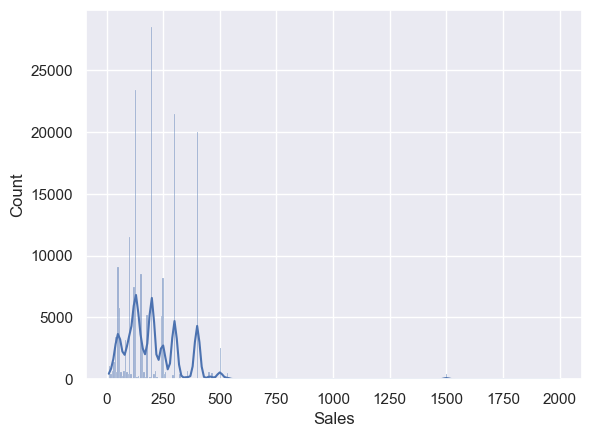

In [41]:
#for continuous variables
# Anormal
statistics = df['Sales'].describe()
statistics

#a histogram with a kernel density estimate (KDE)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.histplot(df['Sales'],kde=True)

print(statistics.loc['mean']+3*statistics.loc['std'])

print((df['Sales']>600.5913285850987).sum())

Order Region
Canada               959
Caribbean           8318
Central Africa      1677
Central America    28341
Central Asia         553
East Africa         1852
East of USA         6915
Eastern Asia        7280
Eastern Europe      3920
North Africa        3232
Northern Europe     9792
Oceania            10148
South America      14935
South Asia          7731
South of  USA       4045
Southeast Asia      9539
Southern Africa     1157
Southern Europe     9431
US Center           5887
West Africa         3696
West Asia           6009
West of USA         7993
Western Europe     27109
Name: count, dtype: int64
Sales per customer
8.47       0.000141
8.66       0.000704
8.99       0.000141
9.03       0.000282
9.23       0.000422
             ...   
1425.00    0.000141
1440.00    0.000141
1455.00    0.000141
1470.00    0.000141
1485.00    0.000141
Name: count, Length: 1147, dtype: float64


<Axes: xlabel='Sales per customer'>

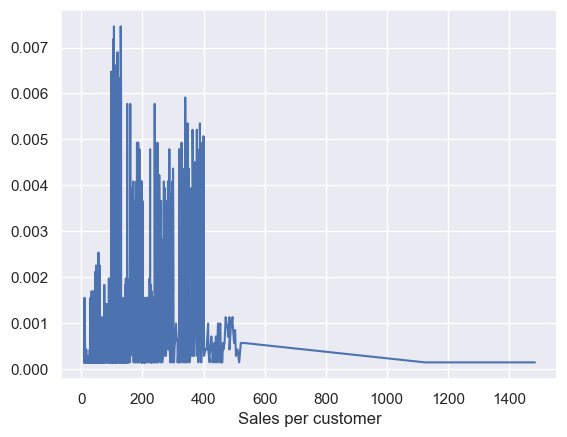

In [68]:
# regular consistency
# Independent and identically distribution
from sklearn.model_selection import train_test_split
print(df['Order Region'].value_counts().sort_index())
oceania_df = df[df['Order Region'] == 'Oceania']
oceania_df

train_data, test_data = train_test_split(oceania_df,test_size=0.3, random_state = 42)

df.columns.tolist()

features = ['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer']

print(train_data['Sales per customer'].value_counts().sort_index()/train_data.shape[0])
(train_data['Sales per customer'].value_counts().sort_index()/train_data.shape[0]).plot()


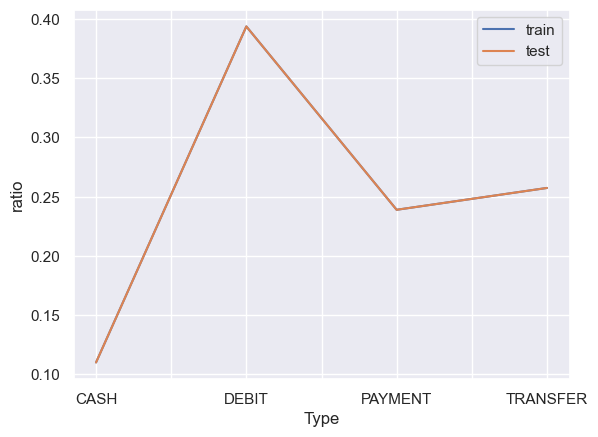

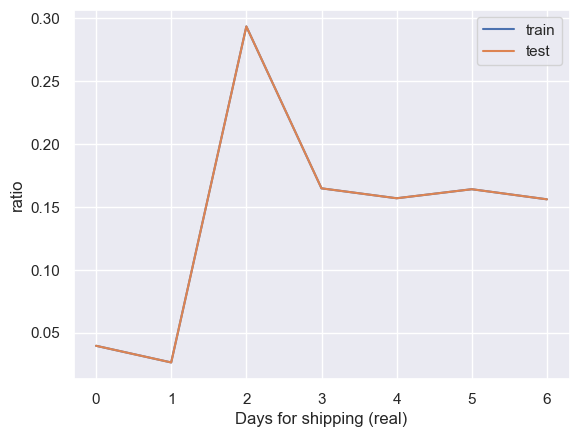

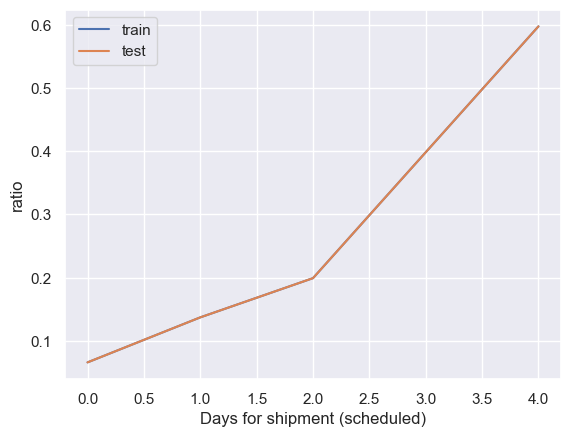

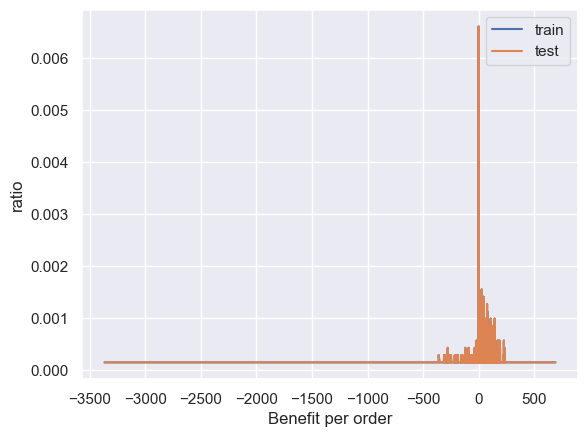

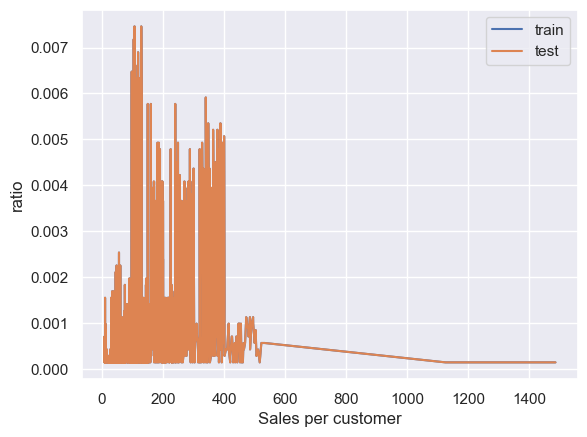

In [69]:
for feature in features:
    (train_data[feature].value_counts().sort_index()/train_data.shape[0]).plot()
    (train_data[feature].value_counts().sort_index()/train_data.shape[0]).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

In [ ]:
# Multi variables
# 0/1,A/B----> 0A,0B,1A,1B

# Feature engineering